In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from keras.models import load_model
import matplotlib.pyplot as plt
import scipy.io
from result_utils import *
import numpy as np

In [2]:
data_path = r"path/to/data"

In [ ]:
model_path = 'path/to/saved/model.hdf5'
model_mamuli_L2 = load_model(model_path)
models = [model_mamuli_L2]

In [15]:
test_lists_path = os.path.join(data_path, 'test_list.csv')
with open(test_lists_path) as f:
    test_list = f.read().split('\n')[:-1]
test_list

['indoor/box_f.mat',
 'indoor/box_l.mat',
 'indoor/father_christmas_f.mat',
 'indoor/horse_l.mat',
 'indoor/vase2_l.mat',
 'indoor/boll_.mat',
 'indoor/dragon_l.mat',
 'indoor/flamingo_queen_l.mat',
 'outdoor_cloudy/box_f.mat',
 'outdoor_cloudy/box_l.mat',
 'outdoor_cloudy/father_christmas_f.mat',
 'outdoor_cloudy/horse_l.mat',
 'outdoor_cloudy/vase2_l.mat',
 'outdoor_cloudy/dragon_l.mat',
 'outdoor_cloudy/flamingo_queen_l.mat',
 'outdoor_sunny/box_f.mat',
 'outdoor_sunny/father_christmas_f.mat',
 'outdoor_sunny/horse_l.mat',
 'outdoor_sunny/vase2_l.mat',
 'outdoor_sunny/dragon_l.mat',
 'outdoor_sunny/flamingo_queen_l.mat']

In [16]:
tests = [crop_to_bbox(scipy.io.loadmat(os.path.join(data_path, *pth.split('/')))) for pth in test_list]
_ = [print(t.keys()) for t in tests]

dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])
dict_keys(['Normals_gt', 'images', 'mask'])


In [20]:
#fig, axes = plt.subplots(len(models)+2, len(test_list), figsize=(25,20), dpi=200)
predicts = []
predictions_folder = 'path/to/predictions'
create_if_not_exist(predictions_folder)
for i in range(len
               (models)):
    for j, obj in enumerate(tests):

        predicted = predict_one_object(models[i], obj, 1, 64)
        mae = np.rad2deg(calculate_mae(predicted[obj['mask'] == 1], obj['Normals_gt'][obj['mask'] == 1]))
        name = 'model' + str(i) + '_' + test_list[j].replace('/','_') + '_mae_' + str(round(mae, 2)) + '.npy'
        save_path = os.path.join(predictions_folder, name)
        np.save(save_path, predicted)
        predicts.append(predicted)

In [22]:
preds = iter(predicts)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

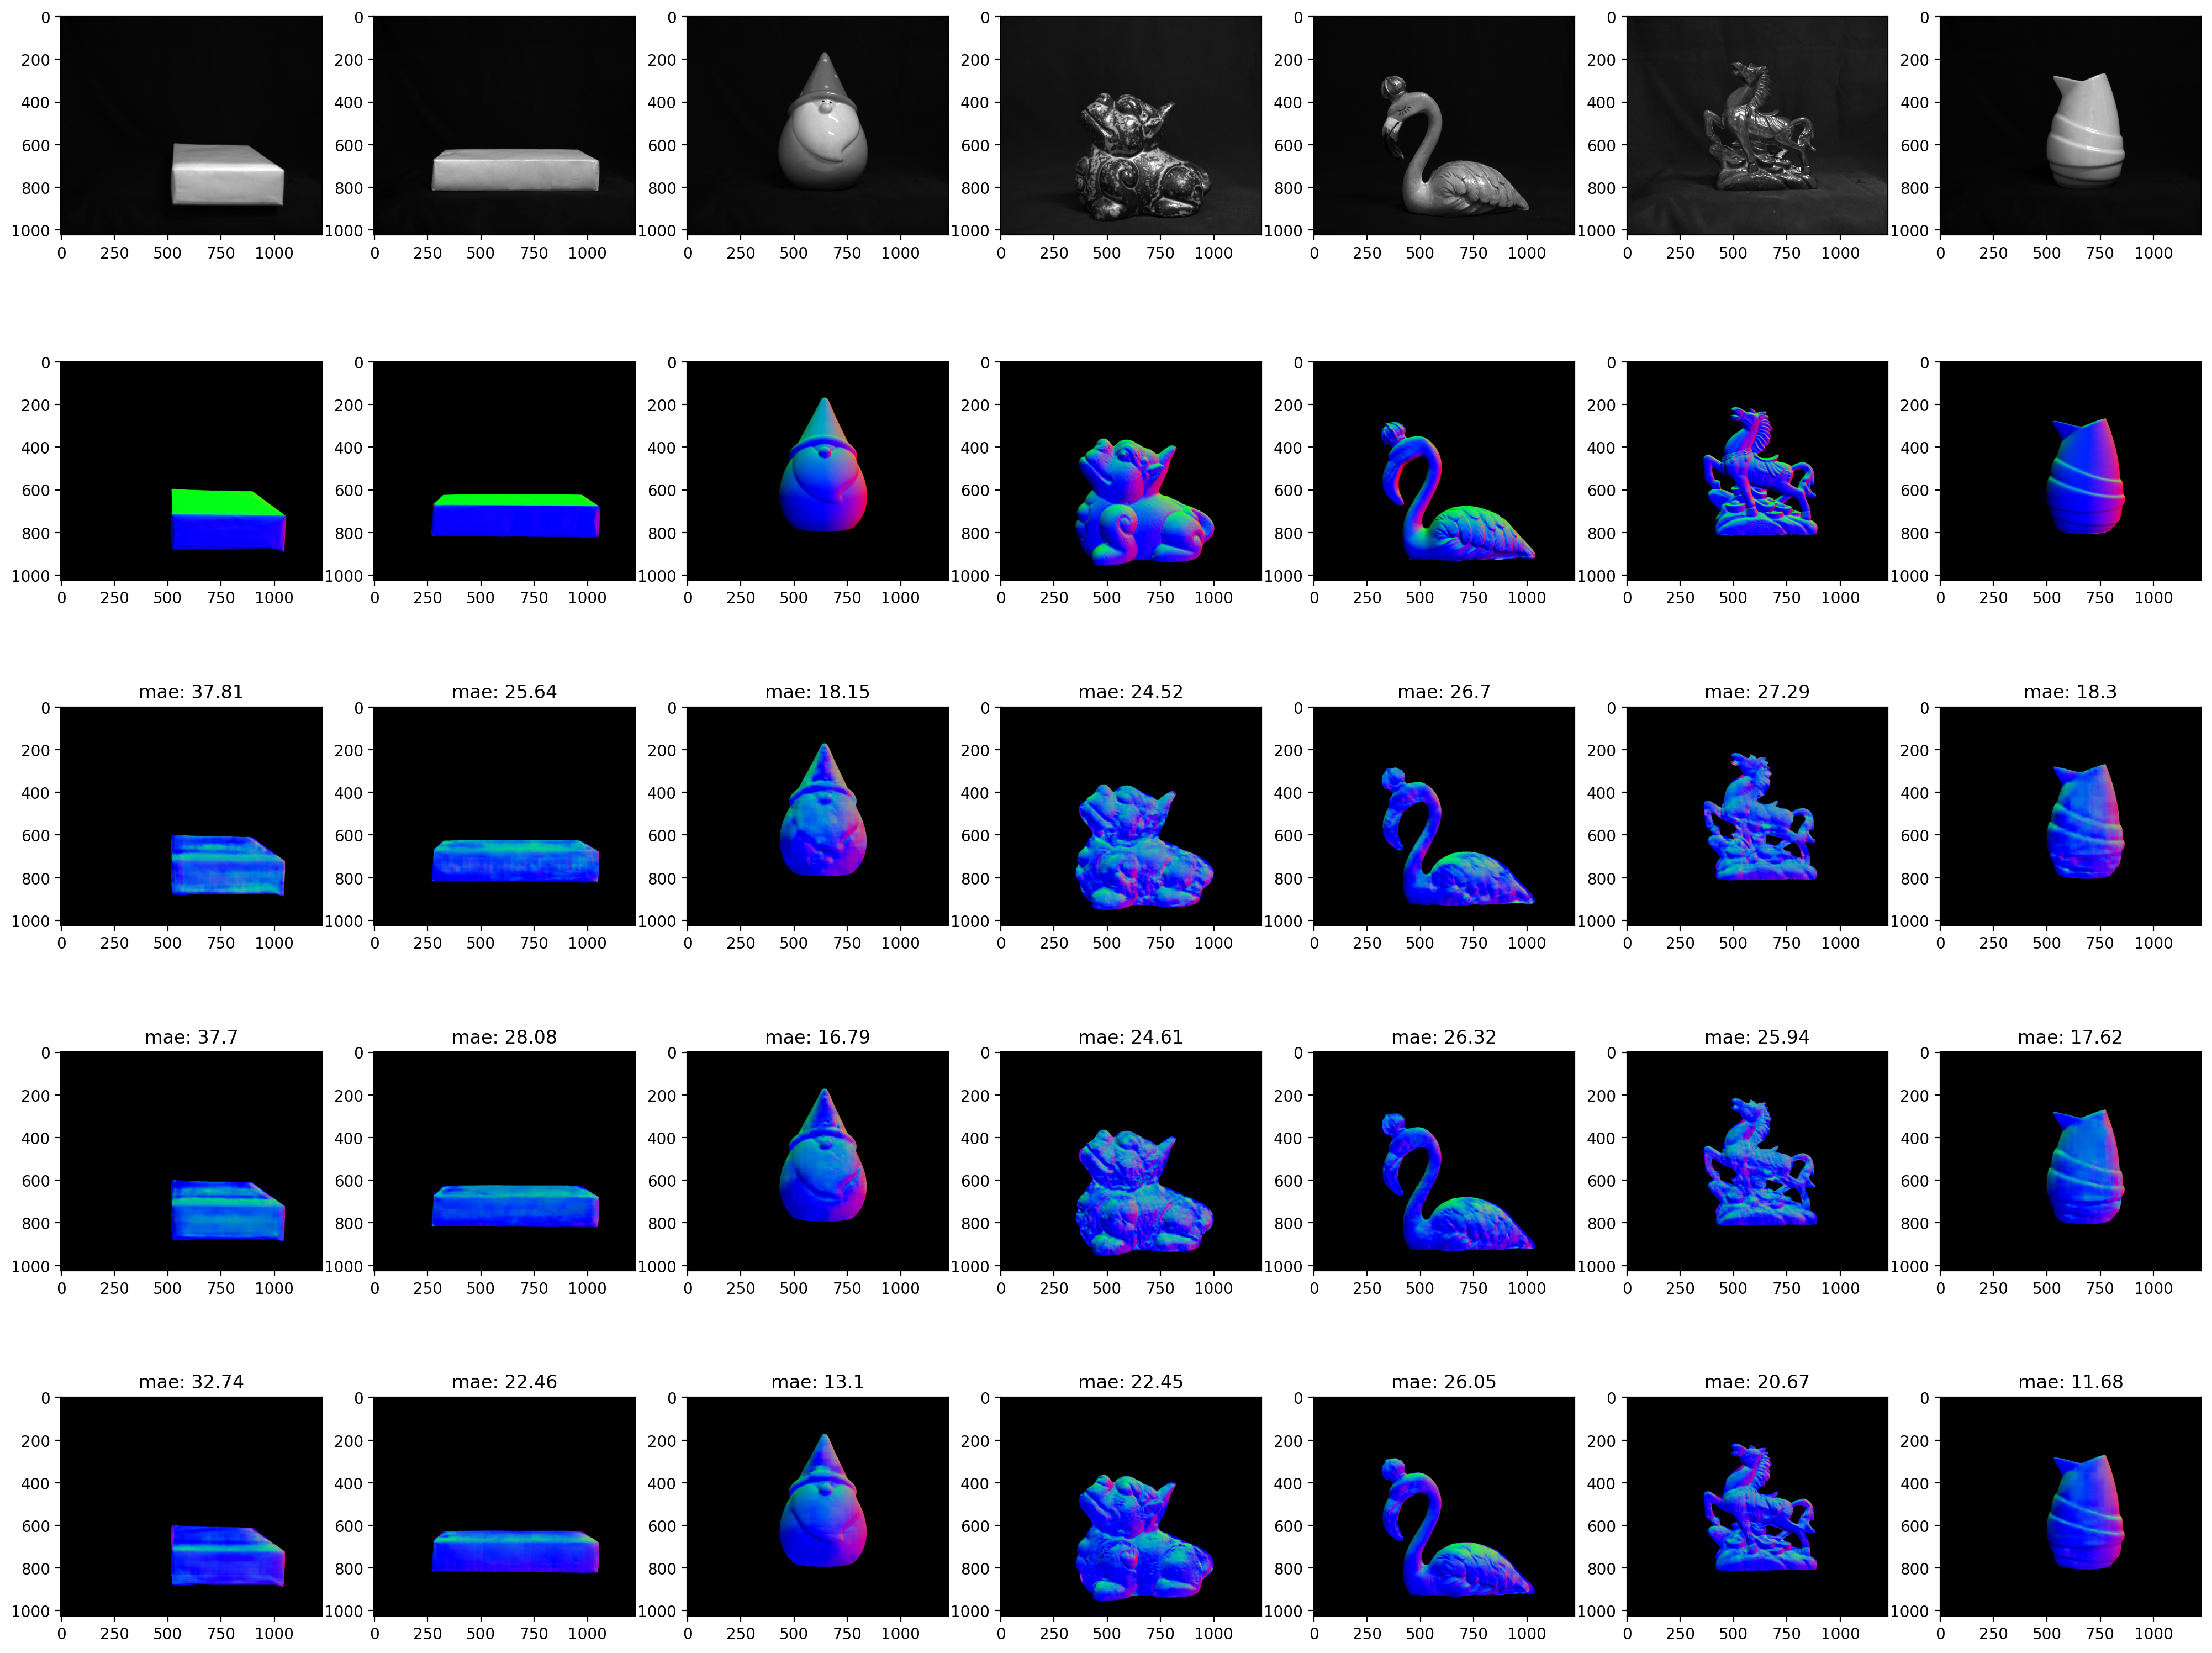

In [23]:
fig, axes = plt.subplots(len(models)+2, len(test_list), figsize=(25,20), dpi=200)
for i in range(len(models)+2):
    for j, obj in enumerate(tests):
        if i == 0:
            axes[i][j].imshow(obj['images'][..., 0], 'gray')
        elif i == 1:
            axes[i][j].imshow(obj['Normals_gt'])
        else:
            predicted = next(preds)
            axes[i][j].imshow(predicted)
            mae = np.rad2deg(calculate_mae(predicted[obj['mask'] == 1], obj['Normals_gt'][obj['mask'] == 1]))
            axes[i][j].set_title(str('mae: {}'.format(round(mae, 2))))
